In [ ]:
# Моделирование выборки из абсолютного непрерывного закона распределения.
# Закон: Par(x_0, k) = (k/x_0) * (x_0/x)^(k + 1), x >= x_0; x_0 = 200; k = 4; Объём выборки (n): 120;

# Лабораторная работа № 3 по Математической Статистике;
# Вариант 13;
# Выполнил: Фомин Олег Витальевич;
# Группа: ФН11-53Б;

In [ ]:
# 1. Для данного 𝑛 методом обратных функций смоделируйте выборку из закона
# распределения с заданной плотностью 𝑝(𝑥).

import matplotlib.pyplot as plt
from scipy.stats import pareto
from numpy import random
import numpy as np
import pandas as pd

# Зафиксируем посев рандомизированных данных:
random.seed(10)

# Сгенерируем n=120 случайных чисел из отрезка [0; 1]

n = 120
data_y = [random.uniform(0, 1) for i in range(n)]
print("Первые 10 элементов из рандомизированного массива:", *data_y[:10], sep='\n')

# С помощью метода обратных функций смоделируем выборку:
# Определим обратную функцию распределения к нашей
def G(y):
    return 200 / (1 - y) ** (1/4)

# Моделируем выборку:
data_x = [G(y) for y in data_y]
print("\nПервые 10 элементов выборки:", *data_x[:10], sep='\n')

Первые 10 элементов из рандомизированного массива:
0.771320643266746
0.0207519493594015
0.6336482349262754
0.7488038825386119
0.4985070123025904
0.22479664553084766
0.19806286475962398
0.7605307121989587
0.16911083656253545
0.08833981417401027

Первые 10 элементов выборки:
289.2166259062597
201.05126812299946
257.0723831260992
282.5054074068173
237.66420644571812
213.14545912909813
211.34642913009506
285.90222816205574
209.4807991101594
204.67827517132318


In [ ]:
# 2. Для полученной выборки найдите гистограмму относительных частот.
# Постройте на одном рисунке графики теоретической плотности 𝑝(𝑥) и
# гистограмму относительных частот.

mini = round(np.min(data_x), 5)
maxi = round(np.max(data_x), 5)
w = maxi - mini
print("Минимальный член вариационного ряда:", mini)
print("Максимальный член вариационного ряда:", maxi)
print("Размах выборки:", w)

l = int(1 + np.log2(n))
h = round(w / l, 5)
print("Число интервалов:", l)
print("Ширина интервала:", h)

Минимальный член вариационного ряда: 200.1979
Максимальный член вариационного ряда: 599.65003
Размах выборки: 399.45213
Число интервалов: 7
Ширина интервала: 57.06459


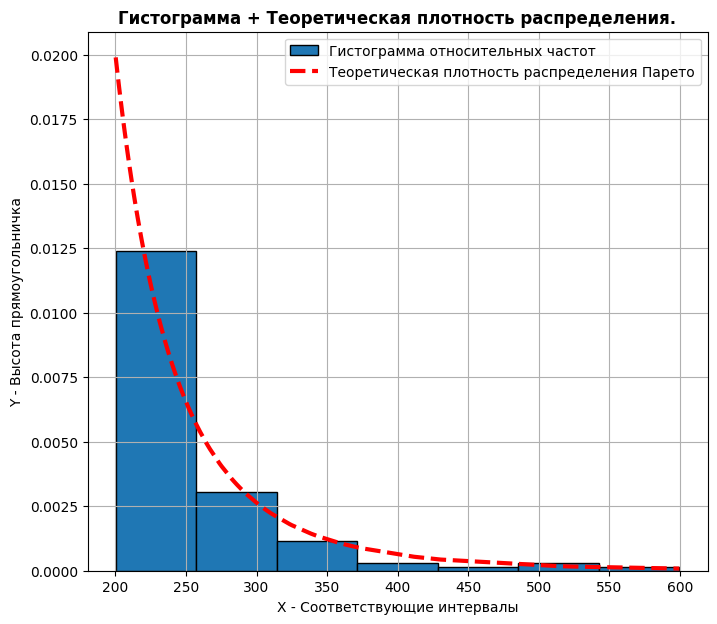

In [ ]:
# Данные для отрисовки теоретической плотности:
x_axis = sorted(np.array(data_x))
y_axis = (1/50) * (200) ** (5) / np.power(x_axis, 5)

# Настройка графика и исходные данные:

plt.figure(figsize=(8,7))
plt.grid()

# Гистограмма:
plt.hist(np.array(data_x),
         bins = l,
         edgecolor='black',
         density=True,
         label='Гистограмма относительных частот')

# График Теоретической плотности распределения:
plt.plot(x_axis,
         y_axis,
         linewidth=3,
         label = 'Теоретическая плотность распределения Парето',
         color = 'red',
         linestyle="dashed")

# Добавление приписочек:
plt.title("Гистограмма + Теоретическая плотность распределения.", fontweight = 'bold')
plt.legend(loc='best')
plt.xlabel('X - Соответствующие интервалы')
plt.ylabel('Y - Высота прямоугольничка')

# Вывод графика:
plt.show()

In [ ]:
# 3. Вычислите выборочное среднее и выборочную дисперсию и сравните с
# истинными значениями этих характеристик.

# Теоретическое среднее (математическое ожидание): 800/3 = 266.6(6)
M_xi = 800/3 # считал на бумаге
print("1.1 Теоретическое среднее (математическое ожидание):", M_xi)
# Истинное значение Дисперсии: 80000/9 = 8888.8(8)
D_xi = 80000/9 # считал на бумаге
print("2.1 Истинное значение Дисперсии", D_xi)

# Выборочное (эмпирическое) среднее:
print("1.2 Выборочное среднее: ", np.mean(data_x))

# Выборочная дисперсия:
print("2.2 Выборочная дисперсия: ", np.var(data_x))

# Сравнение характеристик:
print("\nЭмпирическое среднеквадратическое отклонение: ", (np.var(data_x)) ** (1/2))
print("Сравнение выборочных средних:", abs(M_xi - np.mean(data_x)), "- Адекватное значение, учитывая большое значение среднеквадратического отклонения.")
print("Сравнение дисперсий:", (D_xi / np.var(data_x))**(1/2), "- Значение крупно отклоняется от 1, не понятно можно ли считать полученные данные легитимными\nотносительно теоретического распределения.")

1.1 Теоретическое среднее (математическое ожидание): 266.6666666666667
2.1 Истинное значение Дисперсии 8888.888888888889
1.2 Выборочное среднее:  255.50813462237338
2.2 Выборочная дисперсия:  4308.925935950797

Эмпирическое среднеквадратическое отклонение:  65.64240958367385
Сравнение выборочных средних: 11.15853204429331 - Адекватное значение, учитывая большое значение среднеквадратического отклонения.
Сравнение дисперсий: 1.4362803674662068 - Значение крупно отклоняется от 1, не понятно можно ли считать полученные данные легитимными
относительно теоретического распределения.


[Text(0.5, 0, 'random value'), Text(0, 0.5, 'Density'), Text(0.5, 1.0, 'CDF')]

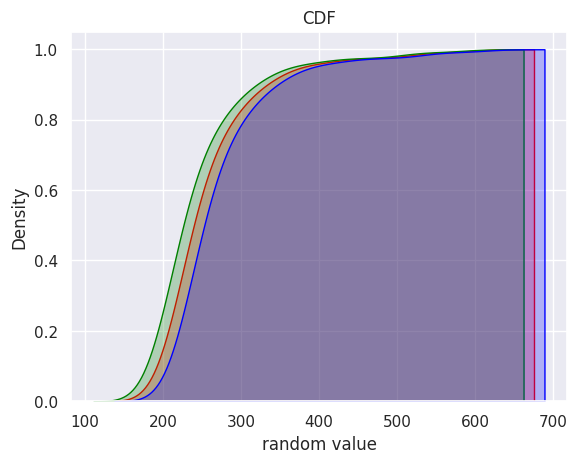

In [ ]:
# 4. Используя неравенство Дворецкого-Кифера-Волфовица, постройте 90%
# доверительный интервал для функции распределения 𝐹(𝑥).
# Приведите графическую иллюстрацию и сформулируйте выводы.

import seaborn as sns
import math

alpha = 0.1
epsilon = math.sqrt(math.log(2 / alpha, math.e) / 2 * n)

data_x_m_eps = np.array(data_x) - epsilon
data_x_p_eps = np.array(data_x) + epsilon
sns.set_theme()

ax = sns.kdeplot(data_x,
            cumulative=True,
            color="red",
            fill=True,
            label='main')

ax = sns.kdeplot(data_x_m_eps,
            cumulative=True,
            color="green",
            fill=True,
            label='-5%')

ax = sns.kdeplot(data_x_p_eps,
            cumulative=True,
            color="blue",
            fill=True,
            label='+5%')

ax.set(xlabel='random value',
       ylabel='Density',
       title='CDF')